# Metric Analysis

In [1]:
import os
import pandas as pd
current_path = os.getcwd()
current_path

'/workspaces/Bg_pre2'

In [2]:
direct_mix_metrics = pd.read_csv(os.path.join(current_path, 'metrics', 'direct_mix_metrics.csv'))
self_learning_metrics = pd.read_csv(os.path.join(current_path, 'metrics', 'self_learning_metrics.csv'))
stacking_metrics = pd.read_csv(os.path.join(current_path, 'metrics', 'stacking_metrics.csv'))

In [3]:
mix_metrics = pd.concat([direct_mix_metrics, self_learning_metrics, stacking_metrics], axis=0, ignore_index=True)

In [4]:
mix_metrics = mix_metrics.replace({'Train_set': {'meta': 'mix'}})
mix_metrics

,Model,Error_Type,Train_set,Test_set,R²,RMSE,MAE
0,Direct Mix XGBoost,Train,mix,mix,0.782610,0.395588,0.198970
1,Direct Mix XGBoost,Test,mix,dft,0.671913,0.489908,0.355114
2,Direct Mix XGBoost,Test,mix,exp,0.128330,0.738788,0.590792
3,Direct Mix XGBoost,Test,mix,mix,0.439217,0.611707,0.461332
4,Self Learning XGBoost,Train,mix,mix,0.977411,0.117248,0.087633
5,Self Learning XGBoost,Test,mix,dft,0.275875,0.727825,0.512312
6,Self Learning XGBoost,Test,mix,exp,0.738197,0.404884,0.296512
7,Self Learning XGBoost,Test,mix,mix,0.481469,0.588211,0.398457
8,Stacking XGBoost,Train,mix,meta,0.989727,0.081504,0.046143
9,Stacking XGBoost,Test,mix,dft,0.203850,0.763164,0.608136


In [5]:
mix_metrics = mix_metrics[mix_metrics['Error_Type'] != 'Train']
mix_metrics

,Model,Error_Type,Train_set,Test_set,R²,RMSE,MAE
1,Direct Mix XGBoost,Test,mix,dft,0.671913,0.489908,0.355114
2,Direct Mix XGBoost,Test,mix,exp,0.128330,0.738788,0.590792
3,Direct Mix XGBoost,Test,mix,mix,0.439217,0.611707,0.461332
5,Self Learning XGBoost,Test,mix,dft,0.275875,0.727825,0.512312
6,Self Learning XGBoost,Test,mix,exp,0.738197,0.404884,0.296512
7,Self Learning XGBoost,Test,mix,mix,0.481469,0.588211,0.398457
9,Stacking XGBoost,Test,mix,dft,0.203850,0.763164,0.608136
10,Stacking XGBoost,Test,mix,exp,0.648289,0.469285,0.340041
11,Stacking XGBoost,Test,mix,mix,0.430830,0.616264,0.464387


In [6]:
mix_metrics.drop(columns=['Error_Type'], inplace=True)

/tmp/ipykernel_23001/1156461529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mix_metrics.drop(columns=['Error_Type'], inplace=True)


In [7]:
mix_metrics

,Model,Train_set,Test_set,R²,RMSE,MAE
1,Direct Mix XGBoost,mix,dft,0.671913,0.489908,0.355114
2,Direct Mix XGBoost,mix,exp,0.128330,0.738788,0.590792
3,Direct Mix XGBoost,mix,mix,0.439217,0.611707,0.461332
5,Self Learning XGBoost,mix,dft,0.275875,0.727825,0.512312
6,Self Learning XGBoost,mix,exp,0.738197,0.404884,0.296512
7,Self Learning XGBoost,mix,mix,0.481469,0.588211,0.398457
9,Stacking XGBoost,mix,dft,0.203850,0.763164,0.608136
10,Stacking XGBoost,mix,exp,0.648289,0.469285,0.340041
11,Stacking XGBoost,mix,mix,0.430830,0.616264,0.464387


In [8]:
exp_dft_metrics = pd.read_csv(os.path.join(current_path, 'metrics', 'single_model_metrics.csv'))
exp_dft_metrics = exp_dft_metrics[exp_dft_metrics['Model'] == 'XGBoost']

In [9]:
exp_dft_metrics.drop(columns=['MAPE'], inplace=True)
exp_dft_metrics.reset_index(drop=True, inplace=True)
exp_dft_metrics

,Model,Train_set,Test_set,R²,RMSE,MAE


In [10]:
exp_dft_metrics.loc[:3, 'Model'] = 'DFT XGBoost'
exp_dft_metrics.loc[3:, 'Model'] = 'EXP XGBoost'
exp_dft_metrics

,Model,Train_set,Test_set,R²,RMSE,MAE


In [11]:
metrics = pd.concat([exp_dft_metrics, mix_metrics], axis=0, ignore_index=True)
metrics

,Model,Train_set,Test_set,R²,RMSE,MAE
0,Direct Mix XGBoost,mix,dft,0.671913,0.489908,0.355114
1,Direct Mix XGBoost,mix,exp,0.128330,0.738788,0.590792
2,Direct Mix XGBoost,mix,mix,0.439217,0.611707,0.461332
3,Self Learning XGBoost,mix,dft,0.275875,0.727825,0.512312
4,Self Learning XGBoost,mix,exp,0.738197,0.404884,0.296512
5,Self Learning XGBoost,mix,mix,0.481469,0.588211,0.398457
6,Stacking XGBoost,mix,dft,0.203850,0.763164,0.608136
7,Stacking XGBoost,mix,exp,0.648289,0.469285,0.340041
8,Stacking XGBoost,mix,mix,0.430830,0.616264,0.464387


In [12]:
# calulate the mean of the metrics
metrics.groupby('Model')['RMSE'].mean()


Model
Direct Mix XGBoost       0.613468
Self Learning XGBoost    0.573640
Stacking XGBoost         0.616238
Name: RMSE, dtype: float64

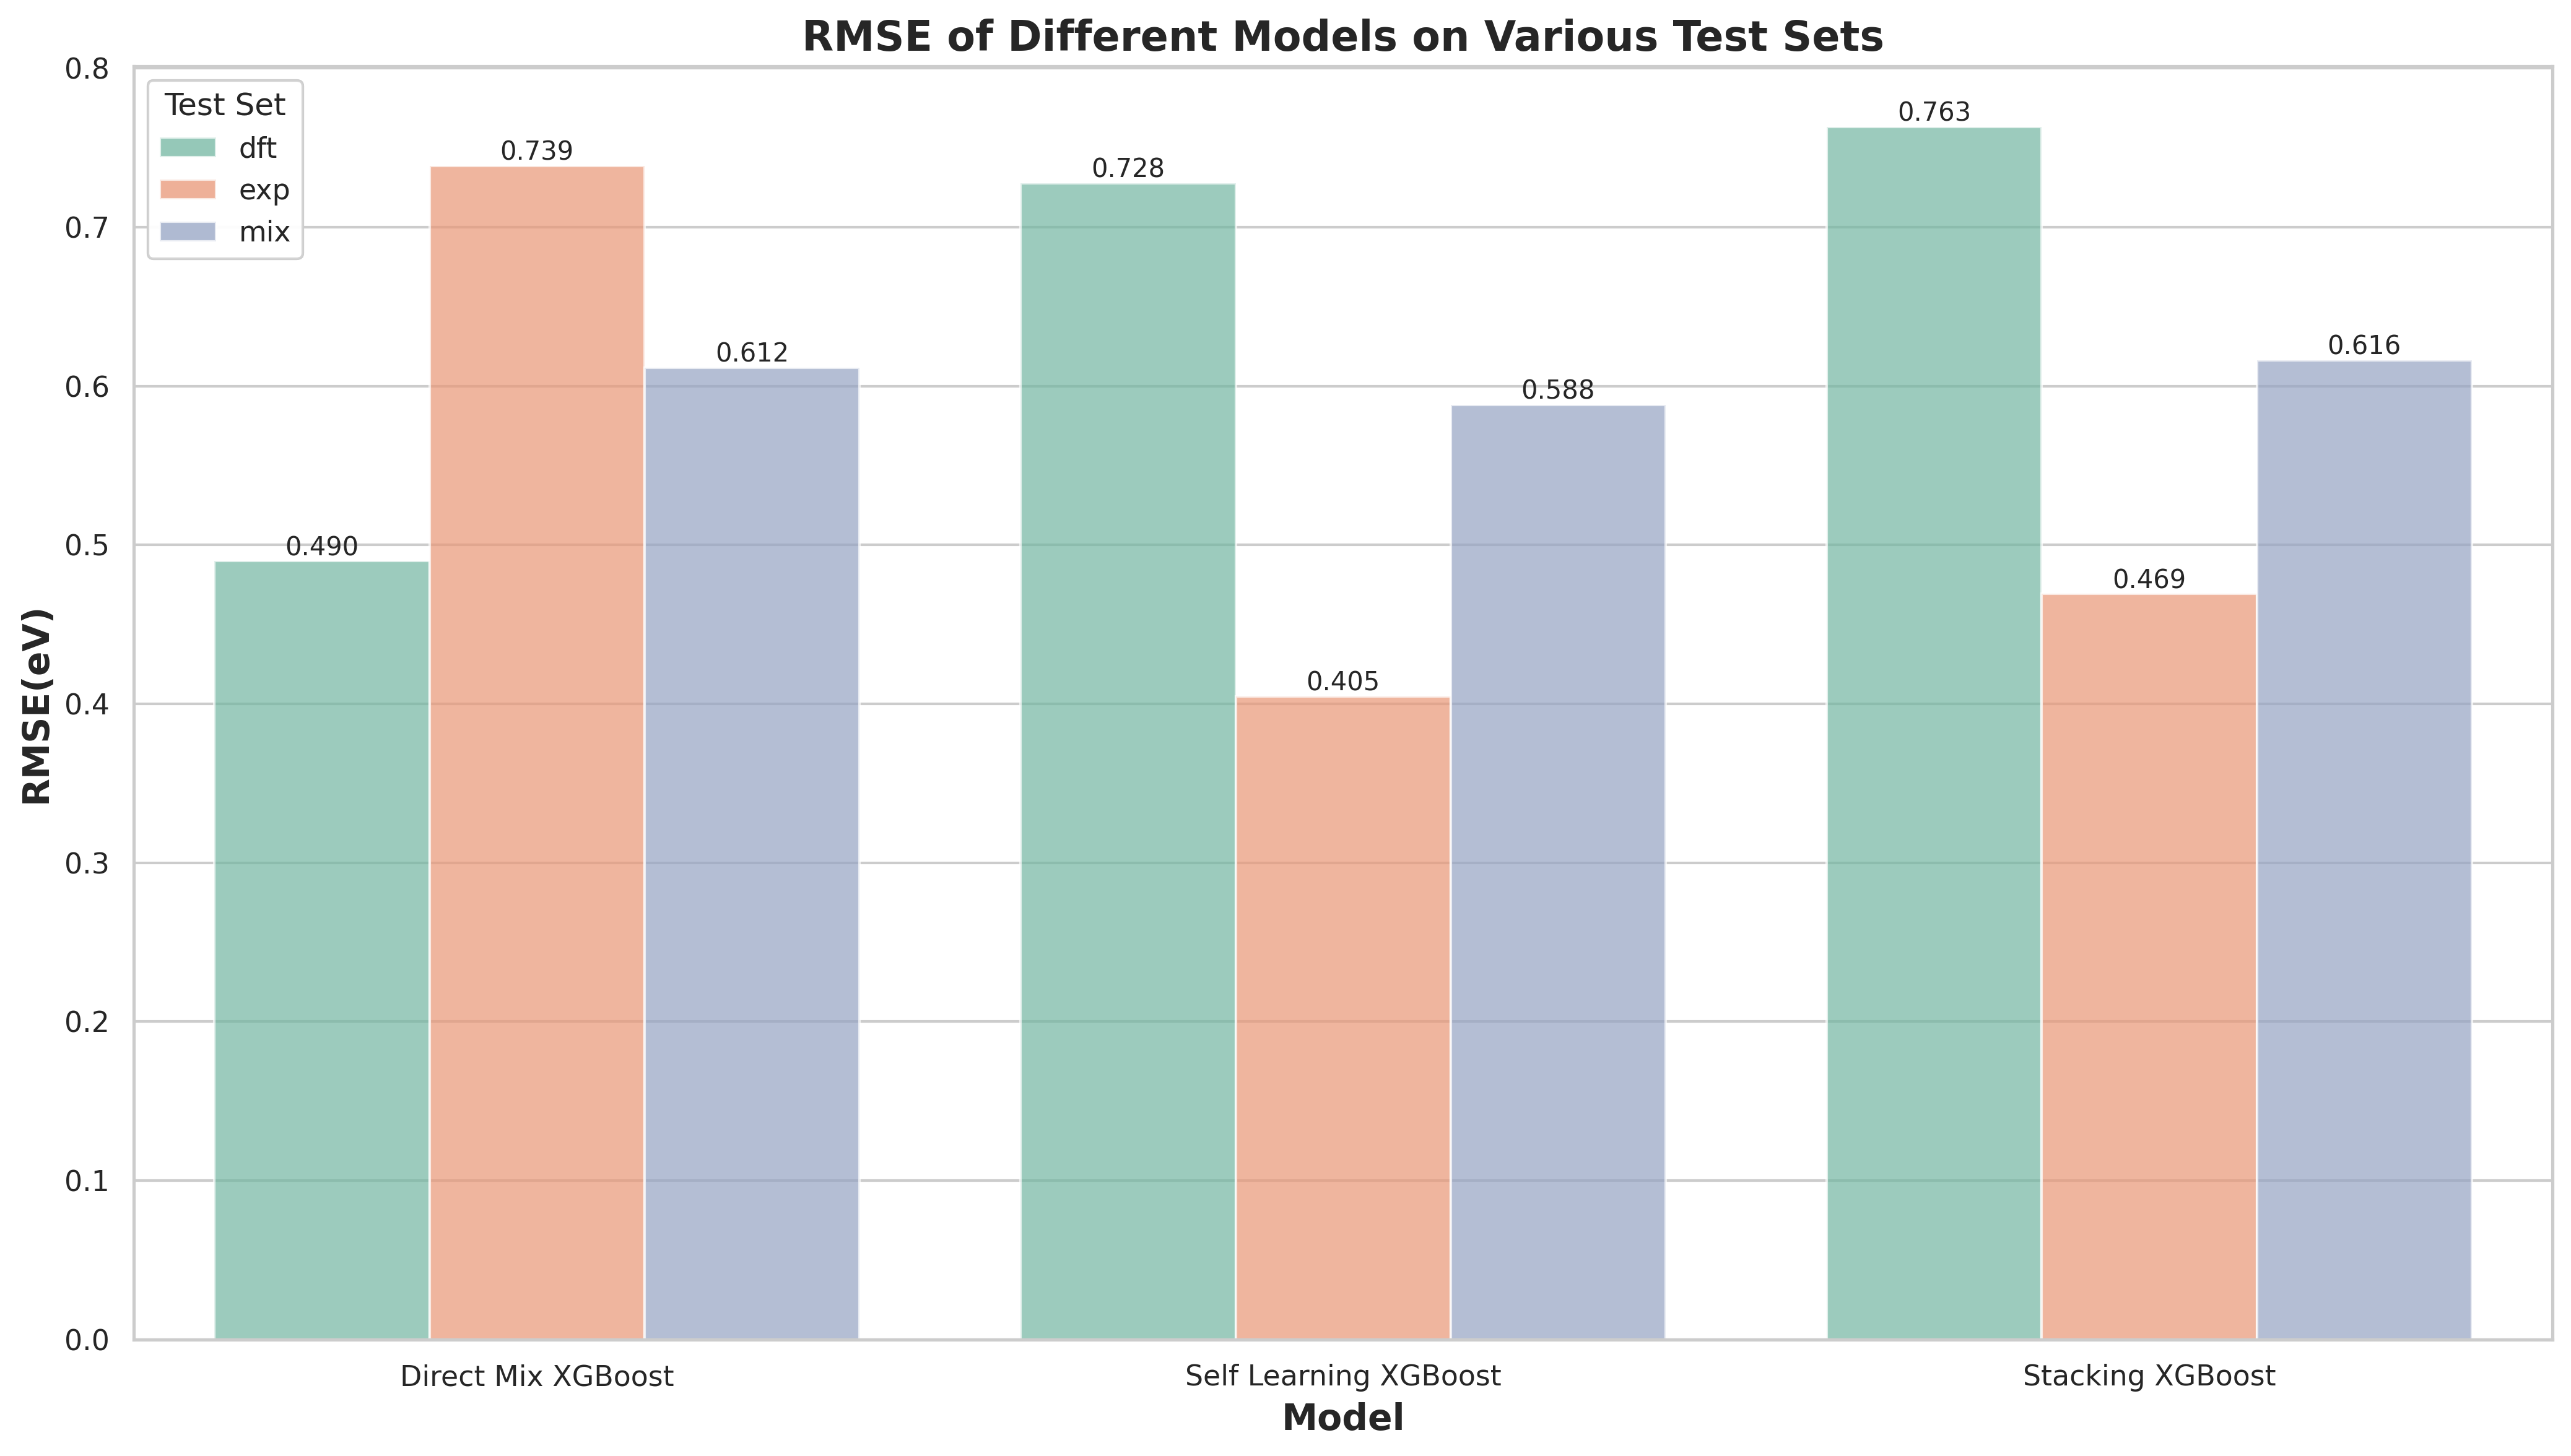

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. draw the rmse comparison figure

# set style
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 8), dpi=300)

# get unique models
models = metrics['Model'].unique()
test_sets = metrics['Test_set'].unique()

# prepare data for plotting
plot_data = []
for model in models:
    model_metrics = metrics[metrics['Model'] == model]
    for _, row in model_metrics.iterrows():
        plot_data.append({
            'Model': row['Model'],
            'Train_set': row['Train_set'],
            'Test_set': row['Test_set'],
            'RMSE': row['RMSE']
        })

plot_df = pd.DataFrame(plot_data)


# create bar plot
ax = sns.barplot(
    x='Model', 
    y='RMSE', 
    hue='Test_set',
    data=plot_df,
    palette='Set2',
    alpha=0.7
)

# add data labels
# add data labels
for p in ax.patches:
    if p.get_height() > 0.01:
        ax.annotate(f'{p.get_height():.3f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10)

# add legend
handles, labels = ax.get_legend_handles_labels()
test_set_legend = plt.legend(handles, labels, title='Test Set', loc='upper left')
ax.add_artist(test_set_legend)

# 
plt.xlabel('Model', fontsize=14, weight='bold')
plt.ylabel('RMSE(eV)', fontsize=14, weight='bold')
plt.title('RMSE of Different Models on Various Test Sets', fontsize=16, weight='bold')

plt.tight_layout()

# save the figure
plt.savefig(os.path.join(current_path, 'figures', 'rmse_comparison_of_mix_model.png'), dpi=300, bbox_inches='tight')
plt.show()